Q1.交差エントロピー損失とは、正解ラベルyに対する予想確率Pに対して$l(y,p)=-logp$と定義される。  
縦軸を交差エントロピー損失-logpとしたグラフをmatplotlibを用いて書いてください。

-補足-  
交差エントロピー損失とは  
分類器がどれだけ正しくラベルを予測しているかどうかを評価する指標の1つ

--前提--  
あるデータ点について、正解ラベルがyだとする。  
分類器がこのデータ点のラベルがyである確率をpと推定したとしました。

$l(y,p)=-logp$

①数値をまとめて計算する
    1,2,3の対数を計算->
    ```
    np.log([1,2,3])=[log1,log2,log3]
    ```
②plt.plot関数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\kawam\AppData\Local\Temp\ipykernel_20760\457537923.py:4: RuntimeWarning: divide by zero encountered in log
  y=-1*np.log(x)


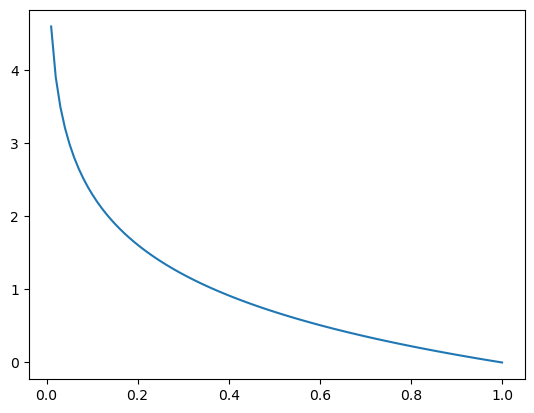

In [2]:
#linspaceで数値をしきつめる
#https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x =np.linspace(start=0,stop=1,num=100)
y=-1*np.log(x)

plt.plot(x,y)
plt.show()

if文　条件分岐
```
好き = ["イヌ","ネコ","イヌ","ネコ"]
得点 = [4,10,-2,10]

イヌ好き = 0
ネコ好き = 0

for i in range(4):
    if 好き[i] == "イヌ":
        イヌ好き　+= 得点[i]
    else:
        ネコ好き += 得点[i]
```

Q2.次のデータフレームを見てください。
ラベル　ラベルy=1の確率の推定
0       0.2
0       0.6
1       0.8
1       0.9

In [3]:
y = [0,0,1,1]
hat_y = [0.2,0.6,0.8,0.9]

y0 = []
y1 = []

for i in range(4):
    if y[i]==0:
      y0.append(-1*np.log(1-hat_y[i]))
    else:
      y1.append(-1*np.log(hat_y[i]))

ans0 = np.mean(y0)
ans1 = np.mean(y1)

交差エントロピーの定義  
-log(正解ラベルに対する確率の推定)

In [4]:
def Crossentropy(y,p):
    if y ==1:
        return -np.log(p)
    else:
        return -np(1-p)

In [5]:
y = [0,0,1,1]
hat_y = [0.2,0.6,0.8,0.9]
list_ce = []
list_ce = [Crossentropy(y[i],hat_y[i])for i in range(4)]

TypeError: 'module' object is not callable

applyメゾット　pd.DataFrameの各行に対して、何かしらの計算をしたい場合に用いる
```
data = pd.DataFrame({"x":[2,4,1,3]
                     "y":[1,3,1,4]})
                     
data.apply(lambda x :x[1]/x[0])      

```

In [6]:
import pandas as pd
data = pd.DataFrame({"x":[2,4,1,3],
                     "y":[1,3,1,4]})
data

,x,y
0,2,1
1,4,3
2,1,1
3,3,4


In [7]:
data.apply(lambda x :x[0]/x[1],axis =1) 

0    2.000000
1    1.333333
2    1.000000
3    0.750000
dtype: float64

In [8]:
result = pd.DataFrame({"x":[0,0,1,1],
                     "y":[0.2,0.6,0.8,0.9]})
result

,x,y
0,0,0.2
1,0,0.6
2,1,0.8
3,1,0.9


In [9]:
ans = result.apply(lambda x: Crossentropy(x[0],x[1]),axis =1) 
ans

TypeError: 'module' object is not callable

Q3.特徴量生成のための関数を作りたい

In [40]:
raw = pd.DataFrame({"id":[1,2,3],
                  "x":[0,3,6],
                  "y":[1,4,4],
                  "z":[2,4,8]})
raw

,id,x,y,z
0,1,0,1,2
1,2,3,4,4
2,3,6,4,8


In [49]:
def preprocess(raw):
    df = raw.copy
    df["x2_y2"] = raw.apply(lambda i:i("x")**2+i("y")**2,axis=1) 
    df["x_div_z"] = raw.apply(lambda i:i("x")/i("z"),axis=1) 
    return df

In [50]:
preprocess(raw)

TypeError: 'Series' object is not callable